<a href="https://colab.research.google.com/github/BaharehAm/-Bankruptcy-prediction-using-optimal-ensemble-models-under-balanced-and-imbalanced-data/blob/main/Bankruptcy_prediction_using_Gradient_boosting_Methods_under_balanced_and_imbalanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
year = 'year1'
test_size = 0.1
ratio = 1

## Import libraries

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
 pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from google.colab import output
import os


from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTEN

# from imblearn.over_sampling import ADASYN
# from imblearn.over_sampling import KMeansSMOTE
# from imblearn.over_sampling import SVMSMOTE

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
# from keras.layers import Input, Dense, SimpleRNN, LSTM, GRU, Bidirectional, Conv1D, MaxPooling1D, Flatten, concatenate, Dropout


import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ast import literal_eval

In [ ]:
import random
def randint(min=0,max=100):
    a = random.randint(min,max)
    return a

randint()

2

## Load data

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/Research/BPY/Data/' + year + '.csv')
print(len(data1))
data1

7027


,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,...,0.121960,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,2,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,...,0.121300,0.42002,0.85300,0,4.1486,3.2732,107.350,3.4,60.987,0
2,3,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,...,0.241140,0.81774,0.76599,0.69484,4.9909,3.951,134.270,2.7185,5.2078,0
3,4,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,5,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,...,0.134850,0.48431,0.86515,0.12444,6.3985,4.3158,127.210,2.8692,7.898,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,7023,0.018371,0.4741,-0.13619,0.60839,-18.449,0.018371,0.018371,0.97203,1.0121,...,0.011909,0.039866,0.98809,0.27414,73.505,79.237,31.268,11.673,5.1489,1
7023,7024,-0.013359,0.58354,-0.02265,0.92896,-42.232,-0.013359,-0.015036,0.56289,0.98904,...,-0.011082,-0.040671,1.01110,0.80592,10.599,7.174,94.092,3.8792,1.7572,1
7024,7025,0.006338,0.50276,0.43923,1.8736,9.7417,0.006338,0.012022,0.98356,1.0083,...,0.008258,0.012817,0.99174,0,10.47,6.0759,51.019,7.1542,62.001,1
7025,7026,-0.041643,0.8481,-0.12852,0.57485,-121.92,0,-0.036795,0.17901,0.42138,...,-0.232720,-0.27429,0.98788,3.5931,39.703,3.142,261.850,1.3939,0.51005,1


## Handling missing data

In [ ]:
data1.iloc[1:2, 23:28]

,Attr23,Attr24,Attr25,Attr26,Attr27
1,0.12304,?,0.39542,0.43992,88.444


In [ ]:
data1_ = data1.iloc[:, 1:65]
data1_.columns
for column_name in data1_.columns:
  data1_[[column_name]]=data1_[[column_name]].replace("?",np.NaN).astype('float32')
data1_.describe()


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,7024.000000,7024.000000,7024.000000,6997.000000,7.019000e+03,7024.000000,7024.000000,7002.000000,7026.000000,7024.000000,...,7.027000e+03,7.027000e+03,7026.000000,7.027000e+03,7026.000000,6.892000e+03,7005.000000,7.027000e+03,6997.000000,6993.000000
mean,0.034660,0.560215,0.119969,2.629143,-2.631673e+02,0.059712,0.313876,2.623996,5.552855,1.825832,...,8.855693e+03,-1.577367e+02,0.193243,1.587408e+02,0.277829,4.328830e+02,15.642229,4.763203e+03,8.126852,208.731949
std,4.565505,5.350083,5.275459,13.257356,3.707460e+04,6.051113,8.353273,18.708326,101.995453,33.836452,...,7.247527e+04,1.322125e+04,4.344046,1.322124e+04,6.339149,2.612802e+04,261.554535,3.107835e+05,19.996418,5140.708984
min,-256.890015,-72.162003,-440.500000,0.000000,-2.722100e+06,-397.890015,-189.559998,-141.410004,0.000005,-440.549988,...,-8.004700e+05,-1.108300e+06,-315.369995,-4.194000e-03,-327.970001,4.700000e-05,0.000016,0.000000e+00,0.000015,0.000010
25%,0.021182,0.296678,0.026968,1.063100,-4.449800e+01,0.000000,0.028023,0.445710,1.037225,0.300785,...,9.712000e+01,2.031450e-02,0.056772,8.647650e-01,0.000000,5.923950e+00,4.829000,4.322250e+01,3.425400,2.538600
50%,0.075802,0.482960,0.181275,1.502000,-5.373900e+00,0.000000,0.090108,1.015100,1.205750,0.492235,...,1.604800e+03,6.338200e-02,0.175745,9.388100e-01,0.028437,1.004050e+01,7.033700,6.850900e+01,5.303200,4.637700
75%,0.160268,0.680233,0.362547,2.460700,3.777050e+01,0.146660,0.188668,2.267675,2.132975,0.675678,...,5.955900e+03,1.376950e-01,0.351922,9.820150e-01,0.273867,2.013900e+01,10.703000,1.063350e+02,8.357900,9.782200
max,94.279999,441.500000,1.000000,1017.799988,9.909000e+05,303.670013,453.769989,1452.199951,3876.100098,1099.500000,...,4.398400e+06,1.000000e+00,126.669998,1.108300e+06,119.580002,2.137800e+06,21110.000000,2.501600e+07,1042.199951,294770.000000


In [ ]:
data1_.iloc[1:2, 23:28]

,Attr24,Attr25,Attr26,Attr27,Attr28
1,NaN,0.39542,0.43992,88.444,16.945999


In [ ]:
for column_name in data1_.columns:
  data1_[column_name].fillna(data1_[column_name].mean(), inplace=True)
  # data1_[column_name].fillna(0, inplace=True)
data1_.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,7027.000000,7027.000000,7027.000000,7027.000000,7.027000e+03,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,...,7.027000e+03,7.027000e+03,7027.000000,7.027000e+03,7027.000000,7.027000e+03,7027.000000,7.027000e+03,7027.000000,7027.000000
mean,0.034660,0.560215,0.119969,2.629143,-2.631673e+02,0.059712,0.313876,2.623996,5.552855,1.825832,...,8.855693e+03,-1.577367e+02,0.193243,1.587408e+02,0.277829,4.328830e+02,15.642228,4.763203e+03,8.126852,208.731964
std,4.564529,5.348941,5.274332,13.229022,3.705348e+04,6.049821,8.351490,18.675013,101.988197,33.829227,...,7.247527e+04,1.322125e+04,4.343737,1.322124e+04,6.338698,2.587579e+04,261.144714,3.107835e+05,19.953682,5128.255371
min,-256.890015,-72.162003,-440.500000,0.000000,-2.722100e+06,-397.890015,-189.559998,-141.410004,0.000005,-440.549988,...,-8.004700e+05,-1.108300e+06,-315.369995,-4.194000e-03,-327.970001,4.700000e-05,0.000016,0.000000e+00,0.000015,0.000010
25%,0.021209,0.296760,0.027011,1.064100,-4.462850e+01,0.000000,0.028037,0.447340,1.037250,0.300900,...,9.712000e+01,2.031450e-02,0.056814,8.647650e-01,0.000000,6.013050e+00,4.834250,4.322250e+01,3.432500,2.550300
50%,0.075790,0.483090,0.181180,1.505200,-5.575300e+00,0.000000,0.090177,1.022100,1.206000,0.492450,...,1.604800e+03,6.338200e-02,0.175820,9.388100e-01,0.028451,1.024900e+01,7.046300,6.850900e+01,5.327800,4.657400
75%,0.160240,0.680170,0.362500,2.476050,3.769500e+01,0.146570,0.188880,2.286700,2.133150,0.675915,...,5.955900e+03,1.376950e-01,0.351895,9.820150e-01,0.274140,2.136650e+01,10.775500,1.063350e+02,8.326800,9.912750
max,94.279999,441.500000,1.000000,1017.799988,9.909000e+05,303.670013,453.769989,1452.199951,3876.100098,1099.500000,...,4.398400e+06,1.000000e+00,126.669998,1.108300e+06,119.580002,2.137800e+06,21110.000000,2.501600e+07,1042.199951,294770.000000


In [ ]:
data1_.iloc[1:2, 23:28]

,Attr24,Attr25,Attr26,Attr27,Attr28
1,0.540231,0.39542,0.43992,88.444,16.945999


## Oversampling & Matrix building (new)

In [ ]:
def Over_sample(Over_sample_method, random_state, ratio, X_train, y_train):
  if ratio != 0:
    count_0 =  len(y_train)-y_train.sum()
    count_1_res = int(count_0 * ratio)
    if Over_sample_method == 'SMOTE':
      oversampler = SMOTE(random_state = random_state, sampling_strategy = {1:count_1_res})
    elif Over_sample_method == 'BorderlineSMOTE':
      oversampler = BorderlineSMOTE(random_state = random_state, sampling_strategy = {1:count_1_res})
    else:
      oversampler = SMOTEN(random_state = random_state, sampling_strategy = {1:count_1_res})
    X_train_res, y_train_res = oversampler.fit_resample(X_train, y_train)
    put_away = (len(y_train_res)-len(y_train)) / len(y_train_res)
    X_train_res_red, _ ,y_train_res_red, _ = train_test_split(X_train_res, y_train_res, test_size=put_away, random_state=random_state, stratify = y_train_res)
    # count_0_res_red = len(y_train_res_red[y_train_res_red['class']==0])
    # count_1_res_red = len(y_train_res_red[y_train_res_red['class']==1])
    # ratio_res_red = count_1_res_red / count_0_res_red
  else:
    X_train_res_red = X_train
    y_train_res_red = y_train
  return X_train_res_red, y_train_res_red

In [ ]:
# def Create_image_label(Over_sample_method, random_state, ratio, X_train, y_train, X_test, y_test):

#   X_train = Over_sample(Over_sample_method, random_state, ratio, X_train, y_train)[0]
#   y_train = Over_sample(Over_sample_method, random_state, ratio, X_train, y_train)[1]

#   all_mat = []
#   for i in range(len(X_train)):
#     mat = []
#     for j in range(8):
#       mat.append(X_train[i][j*8:(j+1)*8])
#     all_mat.append(mat)
#   images = np.array(all_mat)
#   images_train = images.reshape((images.shape[0], images.shape[1], images.shape[2], 1))
#   labels_train = y_train.reshape((y_train.shape[0], 1))

#   all_mat_test = []
#   for i in range(len(X_test)):
#     mat = []
#     for j in range(8):
#       mat.append(X_test[i][j*8:(j+1)*8])
#     all_mat_test.append(mat)
#   images = np.array(all_mat_test)
#   images_test = images.reshape((images.shape[0], images.shape[1], images.shape[2], 1))
#   labels_test = y_test.reshape((y_test.shape[0], 1))

#   return images_train, labels_train, images_test, labels_test


## Ensemble models

In [ ]:
## Load best Hyper-parameters for each model
os.chdir('/content/drive/MyDrive/Research/BPY/Tuning_Results')

Over_sample_method = 'SMOTE'
early_stopping_rounds = 50
od_wait = 0.01
use_best_model=True


model_name = 'CTB'
params = pd.read_csv(year + '_tuning_results_' + model_name + '_' + Over_sample_method + '_' + str(ratio) +'.csv').loc[0]
i3 = params.AVG_AUC
depth = params.depth
learning_rate0 = params.learning_rate
l2_leaf_reg = params.l2_leaf_reg
model_size_reg = params.model_size_reg
# iterations = params.iterations
iterations = 500

model_name = 'LGBM'
params = pd.read_csv(year + '_tuning_results_' + model_name + '_' + Over_sample_method + '_' + str(ratio) +'.csv').loc[0]
j3 = params.AVG_AUC
max_depth = params.max_depth
learning_rate = params.learning_rate
reg_lambda = params.reg_lambda
reg_alpha = params.reg_alpha
min_split_gain = params.min_split_gain
# n_estimators = params.n_estimators
n_estimators = 500


model_name = 'XGB'
params = pd.read_csv(year + '_tuning_results_' + model_name + '_' + Over_sample_method + '_' + str(ratio) +'.csv').loc[0]
k3 = params.AVG_AUC
max_depth2 = params.max_depth
learning_rate2 = params.learning_rate
gamma = params.gamma
reg_lambda2 = params.reg_lambda
reg_alpha2 = params.reg_alpha
min_child_weight =  params.min_child_weight
# n_estimators2 = params.n_estimators
n_estimators2 = 500



os.chdir('/content/drive/MyDrive/Research/BPY/Evaluation_Results/all')
evaluation_results = pd.read_csv('_' + year + '_' + Over_sample_method + '_' + str(ratio) + '_CV10_' +'AVG AUCs.csv')
evaluation_results


,Unnamed: 0,Model,AVG_AUC,STD_AUC,Weights
0,0,CTB,0.946656,0.029194,no weight
1,1,LGBM,0.954941,0.027748,no weight
2,2,XGB,0.947987,0.028460,no weight
3,3,Unweighted Averaging,0.954511,0.026495,equal (no) weight
4,4,Ensemble with variable weights 1,0.956668,0.026385,"[0.24, 0.52, 0.24]"
5,5,Ensemble with variable weights 2,0.955627,0.026137,"[0.3, 0.4, 0.3]"
6,6,Ensemble with optimal weights,0.956095,0.026120,"[0.3, 0.6, 0.1]"


In [ ]:
### hold-out test set (correct)

random_states = [randint() for t in range(10)]
print(random_states)

AUCs_CTB = []
AUCs_LGBM = []
AUCs_XGB = []
AUC1s = []
AUC2s = []
AUC3s = []
AUC4s = []

weights1_all = []  ## [[0.25, 0.5, 0.25], [0.5, 0.25, 0.25]] 10*3 items
weights2_all = []
AUC_weights_all = []  ## [[0.92, 0.94, ..., 0.93], [0.92, 0.94, ..., 0.93]] 10*27 items

for r in random_states:

    random_state = r
    preds = []
    AUC_ = []

    X_train, X_test, y_train, y_test = train_test_split(data1_, data1.iloc[:, -1:], test_size=test_size, random_state=random_state, stratify = data1.iloc[:, -1:])

    ratio_total = len(data1[data1['class']==1])/len(data1[data1['class']==0])
    ratio_train = len(y_train[y_train['class']==1])/len(y_train[y_train['class']==0])
    ratio_test = len(y_test[y_test['class']==1])/len(y_test[y_test['class']==0])
    print("the ratio of class '1' to class '0' in total, training and testing sets are: %.5f, %.5f, and %.5f" %(ratio_total, ratio_train, ratio_test))

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)



    X_y_over_sampled = Over_sample(Over_sample_method, random_state, ratio, X_train, y_train)
    X = X_y_over_sampled[0]
    y = X_y_over_sampled[1]
    X_t = X_test
    y_t = y_test
    model = CatBoostClassifier(iterations=iterations, learning_rate=learning_rate0, depth=depth, od_wait=od_wait, l2_leaf_reg=l2_leaf_reg, model_size_reg=model_size_reg, loss_function='Logloss' )
    eval_set = (X_t, y_t)
    eval_metric = ["auc", "error", "logloss"]
    history_CTB = model.fit(X, y, eval_set=eval_set, early_stopping_rounds=early_stopping_rounds, use_best_model=True, verbose=False)
    ACC = model.score(X_t, y_t)
    y_pred = model.predict(X_t)
    preds.append(y_pred)
    prob_pred = model.predict_proba(X_t)
    AUC = metrics.roc_auc_score(y_t, prob_pred[:,1])
    print('random_state %.f, CTB AUC: %.5F' %(r, AUC))
    prob_pred_CTB = pd.DataFrame(prob_pred)
    prob_pred_CTB.columns=['class0-CTB', 'class1-CTB']
    prob_pred_CTB[['class1-CTB']]
    AUCs_CTB.append(AUC)
    AUC_.append(AUC)



    X_y_over_sampled = Over_sample(Over_sample_method, random_state, ratio, X_train, y_train)
    X = X_y_over_sampled[0]
    y = np.ravel(X_y_over_sampled[1])
    X_t = X_test
    y_t = np.ravel(y_test)
    model = LGBMClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, num_leaves=2**max_depth,
                            reg_lambda=reg_lambda, reg_alpha=reg_alpha, min_split_gain=min_split_gain)
    eval_set = [(X, y), (X_t, y_t)]
    eval_metric = ["auc", "error", "logloss"]
    history_lgbm = model.fit(X, y, early_stopping_rounds=early_stopping_rounds, eval_set=eval_set, eval_metric=eval_metric, verbose=False)
    ACC = model.score(X_t, y_t)
    y_pred = model.predict(X_t)
    preds.append(y_pred)
    prob_pred = model.predict_proba(X_t)
    AUC = metrics.roc_auc_score(y_t, prob_pred[:,1])
    print('random_state %.f, LGBM AUC: %.5F' %(r, AUC))
    prob_pred_lgbm = pd.DataFrame(prob_pred)
    prob_pred_lgbm.columns=['class0-LGBM', 'class1-LGBM']
    prob_pred_lgbm[['class1-LGBM']]
    AUCs_LGBM.append(AUC)
    AUC_.append(AUC)



    X_y_over_sampled = Over_sample(Over_sample_method, random_state, ratio, X_train, y_train)
    X = X_y_over_sampled[0]
    y = np.ravel(X_y_over_sampled[1])
    X_t = X_test
    y_t = np.ravel(y_test)
    X_y_over_sampled = Over_sample(Over_sample_method, random_state, ratio, X_train, y_train)
    X = X_y_over_sampled[0]
    y = np.ravel(X_y_over_sampled[1])
    X_t = X_test
    y_t = np.ravel(y_test)
    model = xgb.XGBClassifier(n_estimators=n_estimators2, max_depth=max_depth2, learning_rate=learning_rate2, gamma=gamma,
                              reg_lambda=reg_lambda2, reg_alpha=reg_alpha2, min_child_weight=min_child_weight)
    eval_set = [(X, y), (X_t, y_t)]
    eval_metric = ["auc", "error", "logloss"]
    history_xgb = model.fit(X, y, early_stopping_rounds=early_stopping_rounds, eval_set=eval_set, eval_metric=eval_metric, verbose=False)
    ACC = model.score(X_t, y_t)
    y_pred = model.predict(X_t)
    preds.append(y_pred)
    prob_pred = model.predict_proba(X_t)
    AUC = metrics.roc_auc_score(y_t, prob_pred[:,1])
    print('random_state %.f, XGB AUC: %.5F' %(r, AUC))
    prob_pred_xgb = pd.DataFrame(prob_pred)
    prob_pred_xgb.columns=['class0-XGB', 'class1-XGB']
    prob_pred_xgb[['class1-XGB']]
    AUCs_XGB.append(AUC)
    AUC_.append(AUC)



    Ensemble1 = 'Unweighted Averaging'
    probs = pd.concat([prob_pred_CTB, prob_pred_lgbm, prob_pred_xgb], axis=1)
    probs.columns = ['0_ctb', '1_ctb', '0_LGBM', '1_LGBM', '0_XGB', '1_XGB']
    probs['mean_0'] = probs[['0_ctb', '0_LGBM', '0_XGB']].mean(axis=1)
    probs['mean_1'] = probs[['1_ctb', '1_LGBM', '1_XGB']].mean(axis=1)
    AUC1 = metrics.roc_auc_score(y_t, probs['mean_1'])
    print('random_state %.f, Ensemble1 AUC: %.5F' %(r, AUC1))
    AUC1s.append(AUC1)



    Ensemble2 = 'Ensemble with variable weights 1'
    i = literal_eval(evaluation_results.iat[4,4])[0]
    j = literal_eval(evaluation_results.iat[4,4])[1]
    k = literal_eval(evaluation_results.iat[4,4])[2]
    weights1 = [i, j, k]
    weights1_all.append(weights1)
    probs['W_mean_0'] = np.average(probs[['0_ctb', '0_LGBM', '0_XGB']], weights=weights1, axis=1)
    probs['W_mean_1'] = np.average(probs[['1_ctb', '1_LGBM', '1_XGB']], weights=weights1, axis=1)
    AUC2 = metrics.roc_auc_score(y_t, probs['W_mean_1'])
    print('random_state %.f, Ensemble2 AUC: %.5F' %(r, AUC2))
    print('weights: ' , weights1)
    AUC2s.append(AUC2)

    Ensemble3 = 'Ensemble with variable weights 2'
    i2 = literal_eval(evaluation_results.iat[5,4])[0]
    j2 = literal_eval(evaluation_results.iat[5,4])[1]
    k2 = literal_eval(evaluation_results.iat[5,4])[2]
    weights2 = [i2, j2, k2]
    weights2_all.append(weights2)
    probs['W_mean_0'] = np.average(probs[['0_ctb', '0_LGBM', '0_XGB']], weights=weights2, axis=1)
    probs['W_mean_1'] = np.average(probs[['1_ctb', '1_LGBM', '1_XGB']], weights=weights2, axis=1)
    AUC3 = metrics.roc_auc_score(y_t, probs['W_mean_1'])
    print('random_state %.f, Ensemble3 AUC: %.5F' %(r, AUC3))
    print('weights: ' , weights2)
    AUC3s.append(AUC3)


    Ensemble4 = 'Ensemble with optimal weights'
    i3 = literal_eval(evaluation_results.iat[6,4])[0]
    j3 = literal_eval(evaluation_results.iat[6,4])[1]
    k3 = literal_eval(evaluation_results.iat[6,4])[2]
    weights3 = [i3, j3, k3]
    probs['W_mean_0'] = np.average(probs[['0_ctb', '0_LGBM', '0_XGB']], weights=weights3, axis=1)
    probs['W_mean_1'] = np.average(probs[['1_ctb', '1_LGBM', '1_XGB']], weights=weights3, axis=1)
    AUC4 = metrics.roc_auc_score(y_t, probs['W_mean_1'])
    print('random_state %.f, Ensemble4 AUC: %.5F' %(r, AUC4))
    print('weights: ' , weights3)
    AUC4s.append(AUC4)

    print('\n')

print(random_states)
print('hold-out AVG AUCs_CTB %.5F, STD: %.5F' %(np.mean(AUCs_CTB), np.std(AUCs_CTB)))
print('hold-out AVG AUCs_LGBM %.5F, STD: %.5F' %(np.mean(AUCs_LGBM), np.std(AUCs_LGBM)))
print('hold-out AVG AUCs_XGB %.5F, STD: %.5F' %(np.mean(AUCs_XGB), np.std(AUCs_XGB)))
print('hold-out Ensemble1 AUC %.5F, STD: %.5F' %(np.mean(AUC1s), np.std(AUC1s)))
print('hold-out Ensemble2 AUC %.5F, STD: %.5F' %(np.mean(AUC2s), np.std(AUC2s)))
print('hold-out Ensemble3 AUC %.5F, STD: %.5F' %(np.mean(AUC3s), np.std(AUC3s)))
print('hold-out Ensemble4 AUC %.5F, STD: %.5F' %(np.mean(AUC4s), np.std(AUC4s)))


[30, 75, 63, 81, 63, 9, 94, 56, 11, 57]
the ratio of class '1' to class '0' in total, training and testing sets are: 0.04011, 0.04013, and 0.03994
random_state 30, CTB AUC: 0.93727
random_state 30, LGBM AUC: 0.94636
random_state 30, XGB AUC: 0.93929
random_state 30, Ensemble1 AUC: 0.94510
random_state 30, Ensemble2 AUC: 0.94543
weights:  [0.24, 0.52, 0.24]
random_state 30, Ensemble3 AUC: 0.94538
weights:  [0.3, 0.4, 0.3]
random_state 30, Ensemble4 AUC: 0.94576
weights:  [0.3, 0.6, 0.1]


the ratio of class '1' to class '0' in total, training and testing sets are: 0.04011, 0.04013, and 0.03994
random_state 75, CTB AUC: 0.93360
random_state 75, LGBM AUC: 0.93809
random_state 75, XGB AUC: 0.94417
random_state 75, Ensemble1 AUC: 0.94247
random_state 75, Ensemble2 AUC: 0.94214
weights:  [0.24, 0.52, 0.24]
random_state 75, Ensemble3 AUC: 0.94236
weights:  [0.3, 0.4, 0.3]
random_state 75, Ensemble4 AUC: 0.94198
weights:  [0.3, 0.6, 0.1]


the ratio of class '1' to class '0' in total, training

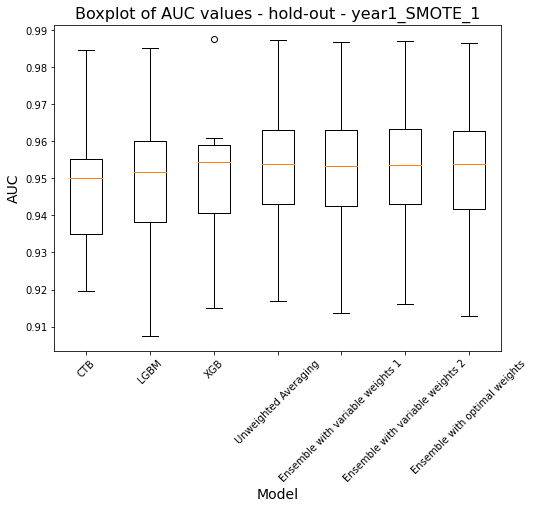

In [ ]:
## Box Plots
model_names = ['CTB', 'LGBM', 'XGB', Ensemble1, Ensemble2, Ensemble3, Ensemble4]
fig, ((ax1)) = plt.subplots(1, 1, figsize=(8, 6))
ax1.boxplot([AUCs_CTB, AUCs_LGBM, AUCs_XGB, AUC1s, AUC2s, AUC3s, AUC4s] )
ax1.set_title('Boxplot of AUC values - hold-out - ' + year + '_' + Over_sample_method + '_' + str(ratio), size=16) # Title
ax1.set_ylabel('AUC', fontsize = 14) # Y label
ax1.set_xlabel('Model', fontsize = 14) # X label
ax1.set_xticklabels(model_names, rotation=45, fontsize=10)
plt.show()

In [ ]:
os.chdir('/content/drive/MyDrive/Research/BPY/Evaluation_Results/all')

df_AUCs_CTB = pd.DataFrame(AUCs_CTB, columns=['AUC'])
df_AUCs_CTB.to_csv(year + '_' + Over_sample_method + '_' + str(ratio) + '_hold-out' +'_AUCs_CTB.csv')

df_AUCs_LGBM = pd.DataFrame(AUCs_LGBM, columns=['AUC'])
df_AUCs_LGBM.to_csv(year + '_' + Over_sample_method + '_' + str(ratio) + '_hold-out' +'_AUCs_LGBM.csv')

df_AUCs_XGB = pd.DataFrame(AUCs_XGB, columns=['AUC'])
df_AUCs_XGB.to_csv(year + '_' + Over_sample_method + '_' + str(ratio) + '_hold-out' + '_AUCs_XGB.csv')

Ensemble1_AUCs = pd.DataFrame(AUC1s, columns=['AUC'])
Ensemble1_AUCs.to_csv(year + '_' + Over_sample_method + '_' + str(ratio) + '_hold-out' +'_Ensemble1.csv')

Ensemble2_AUCs = pd.DataFrame(AUC2s, columns=['AUC'])
Ensemble2_AUCs.to_csv(year + '_' + Over_sample_method + '_' + str(ratio) + '_hold-out' + '_Ensemble2.csv')

Ensemble3_AUCs= pd.DataFrame(AUC3s, columns=['AUC'])
Ensemble3_AUCs.to_csv(year + '_' + Over_sample_method + '_' + str(ratio) + '_hold-out' +'_Ensemble3.csv')

Ensemble4_AUCs= pd.DataFrame(AUC4s, columns=['AUC'])
Ensemble4_AUCs.to_csv(year + '_' + Over_sample_method + '_' + str(ratio) + '_hold-out' + '_Ensemble4.csv')

avg_AUCs = []
avg_AUCs.append(['CTB', np.mean(AUCs_CTB), np.std(AUCs_CTB), 'no weight'])
avg_AUCs.append(['LGBM', np.mean(AUCs_LGBM), np.std(AUCs_LGBM), 'no weight'])
avg_AUCs.append(['XGB', np.mean(AUCs_XGB), np.std(AUCs_XGB), 'no weight'])
avg_AUCs.append([Ensemble1, np.mean(AUC1s), np.std(AUC1s), 'equal (no) weight'])
avg_AUCs.append([Ensemble2, np.mean(AUC2s), np.std(AUC2s), weights1  ])
avg_AUCs.append([Ensemble3, np.mean(AUC3s), np.std(AUC3s), weights2  ])
avg_AUCs.append([Ensemble4, np.mean(AUC4s), np.std(AUC4s), weights3  ])

df_avg_AUC = pd.DataFrame(avg_AUCs, columns=['Model', 'avg_AUC', 'STD_AUC', 'Weights'])
df_avg_AUC

,Model,avg_AUC,STD_AUC,Weights
0,CTB,0.948630,0.017633,no weight
1,LGBM,0.947715,0.021057,no weight
2,XGB,0.949485,0.019783,no weight
3,Unweighted Averaging,0.952761,0.018991,equal (no) weight
4,Ensemble with variable weights 1,0.951808,0.019784,"[0.24, 0.52, 0.24]"
5,Ensemble with variable weights 2,0.952531,0.019193,"[0.3, 0.4, 0.3]"
6,Ensemble with optimal weights,0.951463,0.020010,"[0.3, 0.6, 0.1]"


In [ ]:
## Save results
os.chdir('/content/drive/MyDrive/Research/BPY/Evaluation_Results/all')

df_avg_AUC.to_csv('_' + year + '_' + Over_sample_method + '_' + str(ratio) + '_hold-out' +'AVG AUCs.csv')
fig.savefig(year + '_' + Over_sample_method + '_' + str(ratio) + '_hold-out' + '.png', bbox_inches='tight')
print(year, ratio)

year1 1
